In [4]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath("../Instruments"))
import numpy as np
from ETF import ETF
from Future import Future
from Treasury import Treasury
from Portfolio import Portfolio
from risk_free_rate import get_risk_free_rate
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Long Only Portfolio With All Collected Assets

In [5]:
SPY = ETF("SPY")
XLB = ETF("XLB")
XLF = ETF("XLF")
XLP = ETF("XLP")
XLY = ETF("XLY")
XLE = ETF("XLE")
XLI = ETF("XLI")
XLK = ETF("XLK")
XLU = ETF("XLU")
XLV = ETF("XLV")

ES1 = Future("ES1")
DX1 = Future("DX1")
SI1 = Future("SI1")
CL1 = Future("CL1")
NG1 = Future("NG1")
GC1 = Future("GC1")
DBC = ETF("DBC")

sixMo = Treasury("0.5")
oneYr = Treasury("1.0")
twoYr = Treasury("2.0")
threeYr = Treasury("3.0")
fiveYr = Treasury("5.0")
sevenYr = Treasury("7.0")
tenYr = Treasury("10.0")
thirtyYr = Treasury("30.0")

all_securities = [XLB, XLF, XLP, XLY, XLE, XLI, XLK, XLU, XLV, ES1, DX1, SI1, CL1, NG1, GC1, sixMo, oneYr, twoYr, threeYr, fiveYr, sevenYr, 
                  thirtyYr]


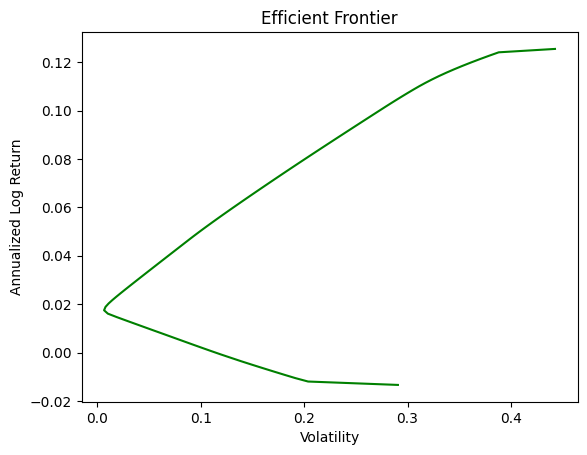

In [6]:
portfolio = Portfolio(all_securities, rf = get_risk_free_rate('2008-05-06'), equity_benchmark = SPY, future_benchmark = DBC,treasury_benchmark = tenYr)
portfolio.filter(startDate="2008-01-01", endDate="2024-01-01", period=1)
max_sharpe_ratio, ret, vol, weights = portfolio.max_sharpe_portfolio(n_points=100, min_weight=0, max_weight=1.0)
portfolio.plot_ef(n_points = 100, min_weight=0, max_weight=1.0)


In [7]:
print("MSR portfolio weights: " + str(weights))
print("MSR portfolio expected annualized log return: " + str(ret))
print("MSR portfolio annualized volatility of log returns: " + str(vol))
print("Sharpe Ratio of Portfolio: "+str(max_sharpe_ratio))
print("MSR portfolio VaR: "+str(portfolio.portfolio_VaR(weights)))
print("MSR portfolio ES: "+str(portfolio.portfolio_ES(weights)))
print()

MSR portfolio weights: [6.99184957e-02 0.00000000e+00 6.82706726e-03 2.78566570e-02
 3.10947749e-02 2.85110042e-02 1.05721094e-01 2.90097667e-02
 7.56376627e-02 5.18892383e-18 5.26534861e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.88886158e-02 6.10861103e-17
 1.50849633e-16 9.69107336e-17 8.29655008e-17 4.27005191e-17
 1.15920429e-17 0.00000000e+00]
MSR portfolio expected annualized log return: 0.04694650897470817
MSR portfolio annualized volatility of log returns: 0.08949660954992528
Sharpe Ratio of Portfolio: 0.3296169041412821
MSR portfolio VaR: 0.14720882281805436
MSR portfolio ES: 0.18460580274712227



In [8]:
# Filters data to only 2024 election cycle
portfolio.filter(startDate="2024-01-01", endDate="2025-01-01", period=1)
portfolio.set_rf(get_risk_free_rate('2024-05-07'))
# See how the calculated weights using data up to and including 2020 election would have worked
# for the 2024 election
print("2024 election period actual annualized log returns: " + str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 5 to November 17 of 2023 (6.5 month period of a non-election year)
portfolio.filter(startDate="2023-05-05", endDate="2023-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2023-05-05'))
print("2023 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 6 to November 18 of 2022 (6.5 month period of a non-election year)
portfolio.filter(startDate="2022-05-06", endDate="2022-11-18", period=-1)
portfolio.set_rf(get_risk_free_rate('2022-05-06'))
print("2022 May 6 to November 18 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 7 to November 19 of 2021 (6.5 month period of a non-election year)
portfolio.filter(startDate="2021-05-07", endDate="2021-11-19", period=-1)
portfolio.set_rf(get_risk_free_rate('2021-05-07'))
print("2021 May 7 to November 19 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))


2024 election period actual annualized log returns: 0.08988742190268717
2023 May 5 to November 17 actual annualized log returns: 0.07416310631354751
2022 May 6 to November 18 actual annualized log returns: 0.004450083293905557
2021 May 7 to November 19 actual annualized log returns: 0.12937979996512566
